
# Classification Algorithms
1. Perceptron
2. Logistic Regression
3. SVM


## Data Importing 

In [ ]:
import pandas as pd
import time

In [ ]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

In [ ]:
dataset = pd.read_csv(url, na_values='?', skipinitialspace=True, header=None, sep=',')

In [ ]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


## Data Cleaning & Preprocessing

The target column has values ranging from 0-4 (0 being absence of heart disease and 1,2,3,4 being the stages of heart disease). So for simply predicting the presence of heart disease, I've converted the values 1-4 to **'1'**. As a result **'0'** depicts absence and **'1'** depicts the presece.

In [ ]:
replace = {0:0, 1:1, 2:1, 3:1, 4:1}

In [ ]:
dataset.iloc[:, 13].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: 13, dtype: int64

In [ ]:
dataset.iloc[:, 13] = dataset.iloc[:, 13].map(replace)

In [ ]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'] 

In [ ]:
dataset.columns = columns

In [ ]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Data Visualisation

In [ ]:
import seaborn as sns

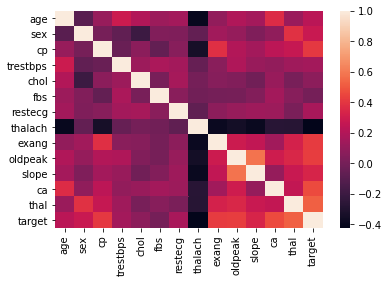

In [ ]:
sns.heatmap(dataset.corr())

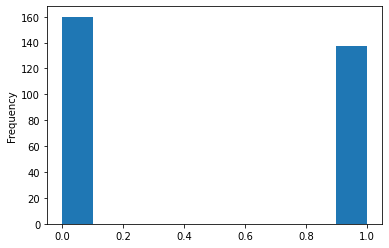

In [ ]:
dataset.iloc[:, 13].plot.hist()

## Spliting Data

In [ ]:
data = dataset.iloc[:, 0:13]
target = dataset.iloc[:, 13:]

In [ ]:
print(data.shape)
print(target.shape)

(297, 13)
(297, 1)


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data, target, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain_sc = sc.fit_transform(xtrain)
xtest_sc = sc.fit_transform(xtest)

In [ ]:
xtrain_sc = pd.DataFrame(xtrain_sc)
xtest_sc = pd.DataFrame(xtest_sc)

## Model Implementation

### 1. Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
start = time.time()
pc = Perceptron()

In [ ]:
pc.fit(xtrain_sc, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
pred_train_pc = pc.predict(xtrain_sc)
pred_test_pc = pc.predict(xtest_sc)

In [ ]:
print('Training Accuracy: ', accuracy_score(pred_train_pc, ytrain))
print('Testing Accuracy : ', accuracy_score(pred_test_pc, ytest))
end = time.time()
print('Time Taken       : ', end-start)

Training Accuracy:  0.8016877637130801
Testing Accuracy :  0.7833333333333333
Time Taken       :  0.0644981861114502


### 2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
start = time.time()
lr = LogisticRegression()

In [ ]:
lr.fit(xtrain_sc, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_train_lr = lr.predict(xtrain_sc)
pred_test_lr = lr.predict(xtest_sc)

In [ ]:
print('Training Accuracy: ', accuracy_score(pred_train_lr, ytrain))
print('Testing Accuracy : ', accuracy_score(pred_test_lr, ytest))
end = time.time()
print('Time Taken       : ', end-start)

Training Accuracy:  0.8565400843881856
Testing Accuracy :  0.8333333333333334
Time Taken       :  0.08150482177734375


### 3. SVM

In [ ]:
from sklearn.svm import SVC
start = time.time()
svc = SVC(kernel='linear')

In [ ]:
svc.fit(xtrain_sc, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred_train_svc = svc.predict(xtrain_sc)
pred_test_svc = svc.predict(xtest_sc)

In [ ]:
print('Training Accuracy: ', accuracy_score(pred_train_svc, ytrain))
print('Testing Accuracy : ', accuracy_score(pred_test_svc, ytest))
end = time.time()
print('Time Taken       : ', end-start)

Training Accuracy:  0.8649789029535865
Testing Accuracy :  0.8333333333333334
Time Taken       :  0.06284308433532715
